In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
import re
import json

In [2]:
with open('li2.json','r') as fp:
    li2 = json.load(fp)

In [3]:
#li2 is tokenized and cleaned version of words of the sentences

In [4]:
li2[0]

['[name]',
 'i',
 'know',
 'i',
 'was',
 'listenin',
 'to',
 'bad',
 'habit',
 'earlier',
 'and',
 'i',
 'started',
 'freakin',
 'at',
 'his',
 'part']

In [5]:
oo = pd.DataFrame(li2)
df = pd.read_csv('data/tweet_emotions.csv')
oo['emotion']=df['sentiment']
oo

,0,1,2,3,4,5,6,7,8,9,...,24,25,26,27,28,29,30,31,32,emotion
0,[name],i,know,i,was,listenin,to,bad,habit,earlier,...,None,None,None,None,None,None,None,None,None,empty
1,Layin,n,bed,with,a,headache,ugh,waitin,on,your,...,None,None,None,None,None,None,None,None,None,sadness
2,Funeral,ceremony,glomy,friday,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,sadness
3,wants,to,hang,out,with,friends,SON!,None,None,None,...,None,None,None,None,None,None,None,None,None,enthusiasm
4,[name],We,want,to,trade,with,someone,who,has,Houston,...,None,None,None,None,None,None,None,None,None,neutral
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39995,[name],None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,neutral
39996,Hapy,Mothers,Day,Al,my,love,None,None,None,None,...,None,None,None,None,None,None,None,None,None,love
39997,Hapy,Mother's,Day,to,al,the,momies,out,"there,",be,...,day!,None,None,None,None,None,None,None,None,love
39998,[name],WASUP,BEAUTIFUL!,FOLOW,ME!,PEP,OUT,MY,NEW,HIT,...,None,None,None,None,None,None,None,None,None,happiness


In [6]:
# droping the duplicates
oon = oo.drop_duplicates()
oon

,0,1,2,3,4,5,6,7,8,9,...,24,25,26,27,28,29,30,31,32,emotion
0,[name],i,know,i,was,listenin,to,bad,habit,earlier,...,None,None,None,None,None,None,None,None,None,empty
1,Layin,n,bed,with,a,headache,ugh,waitin,on,your,...,None,None,None,None,None,None,None,None,None,sadness
2,Funeral,ceremony,glomy,friday,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,sadness
3,wants,to,hang,out,with,friends,SON!,None,None,None,...,None,None,None,None,None,None,None,None,None,enthusiasm
4,[name],We,want,to,trade,with,someone,who,has,Houston,...,None,None,None,None,None,None,None,None,None,neutral
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39994,Sucesfuly,folowing,Tayla!,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,happiness
39996,Hapy,Mothers,Day,Al,my,love,None,None,None,None,...,None,None,None,None,None,None,None,None,None,love
39997,Hapy,Mother's,Day,to,al,the,momies,out,"there,",be,...,day!,None,None,None,None,None,None,None,None,love
39998,[name],WASUP,BEAUTIFUL!,FOLOW,ME!,PEP,OUT,MY,NEW,HIT,...,None,None,None,None,None,None,None,None,None,happiness


In [7]:
ool = oon.iloc[:,:-1]
ool

,0,1,2,3,4,5,6,7,8,9,...,23,24,25,26,27,28,29,30,31,32
0,[name],i,know,i,was,listenin,to,bad,habit,earlier,...,None,None,None,None,None,None,None,None,None,None
1,Layin,n,bed,with,a,headache,ugh,waitin,on,your,...,None,None,None,None,None,None,None,None,None,None
2,Funeral,ceremony,glomy,friday,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
3,wants,to,hang,out,with,friends,SON!,None,None,None,...,None,None,None,None,None,None,None,None,None,None
4,[name],We,want,to,trade,with,someone,who,has,Houston,...,None,None,None,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39994,Sucesfuly,folowing,Tayla!,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
39996,Hapy,Mothers,Day,Al,my,love,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
39997,Hapy,Mother's,Day,to,al,the,momies,out,"there,",be,...,your,day!,None,None,None,None,None,None,None,None
39998,[name],WASUP,BEAUTIFUL!,FOLOW,ME!,PEP,OUT,MY,NEW,HIT,...,None,None,None,None,None,None,None,None,None,None


In [8]:
v = ool.values
v

array([['[name]', 'i', 'know', ..., None, None, None],
       ['Layin', 'n', 'bed', ..., None, None, None],
       ['Funeral', 'ceremony', 'glomy', ..., None, None, None],
       ...,
       ['Hapy', "Mother's", 'Day', ..., None, None, None],
       ['[name]', 'WASUP', 'BEAUTIFUL!', ..., None, None, None],
       ['[name]', 'bulet', 'train', ..., None, None, None]], dtype=object)

In [9]:
vo =[]
for i in range(len(v)):
    vo.append((v[i][v[i]!=None]).tolist())

In [10]:
vo[0]

['[name]',
 'i',
 'know',
 'i',
 'was',
 'listenin',
 'to',
 'bad',
 'habit',
 'earlier',
 'and',
 'i',
 'started',
 'freakin',
 'at',
 'his',
 'part']

In [11]:
seql = pd.Series([len(x) for x in vo])

In [12]:
quant = seql.quantile([0.25,0.5,0.95])
quant

0.25     7.0
0.50    12.0
0.95    25.0
dtype: float64

In [13]:
# as we can the 95% of sequence lengths falls under 25, but max length is 33
# padding all the lengths to 33 will lead to redundancy 
# but padding only to the 25 lenth and truncating remaining tokens will also lead to loss of data

### padding the sequences

In [14]:
max_size = max(len(x) for x in vo)
padded_sequences = [x + ['<null>']* (max_size-len(x)) for x in vo]

In [15]:
max_size

33

In [16]:
#padded_sequences.shape
len(padded_sequences)

39626

In [17]:
x = padded_sequences
y = oon['emotion']

In [18]:
len(x)

39626

In [19]:
# unique_data, indices, counts = np.unique(x, axis=0, return_counts=True, return_index=True) # getting the unique data and it's indices

In [20]:
#len(indices)

In [21]:
# finding duplicate indices
"""
d_ind = []
for i in range(len(x)):
    if i not in indices:
        d_ind.append(i)
len(d_ind)
"""

'\nd_ind = []\nfor i in range(len(x)):\n    if i not in indices:\n        d_ind.append(i)\nlen(d_ind)\n'

In [22]:
#yy = y.drop(d_ind)
#len(yy)

In [23]:
unique_class = y.unique()
num_classes=len(unique_class)
num_classes

13

In [24]:
unique_class

array(['empty', 'sadness', 'enthusiasm', 'neutral', 'worry', 'surprise',
       'love', 'fun', 'hate', 'happiness', 'boredom', 'relief', 'anger'],
      dtype=object)

In [25]:
xx = np.array(x)
yy = y.values

In [26]:
xx.shape,yy.shape

((39626, 33), (39626,))

In [27]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_int = le.fit_transform(yy)
y_int

array([ 2, 10, 10, ...,  7,  5,  7])

In [28]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(xx,y_int,test_size=0.4,random_state=42)
print(x_train.shape,y_train.shape)
print(x_test.shape,y_test.shape)

(23775, 33) (23775,)
(15851, 33) (15851,)


In [29]:
x_train[0],unique_class[y_train[0]]

(array(['[name]', 'Sometimes', 'I', 'wish', 'Twiter', 'had', "Facebok's",
        'quotlikequot', 'just', 'so', 'I', 'could', 'give', 'you', 'a',
        'thumbs', 'up', 'Great', 'job', 'either', 'way', 'I', 'suck', 'to',
        'btw', '<null>', '<null>', '<null>', '<null>', '<null>', '<null>',
        '<null>', '<null>'], dtype='<U53'),
 'fun')

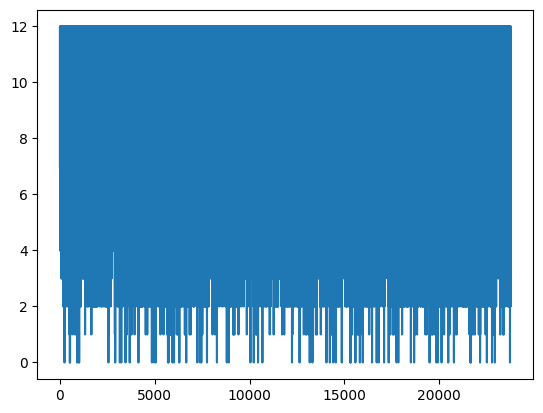

In [30]:
plt.plot(y_train)

In [31]:
x_val,x_test,y_val,y_test = train_test_split(x_test,y_test,test_size=0.5,random_state=42)
print(x_val.shape,y_val.shape)
print(x_test.shape,y_test.shape) 

(7925, 33) (7925,)
(7926, 33) (7926,)


### Hybrid sampling

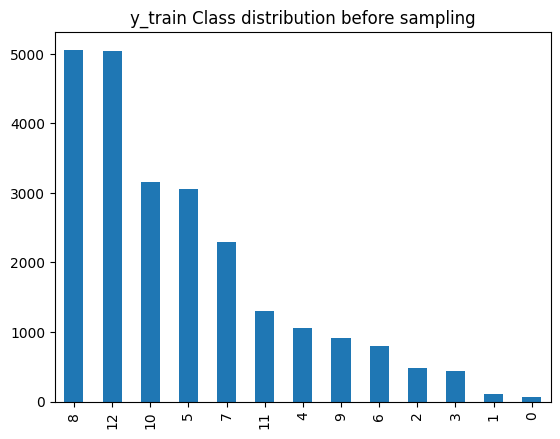

In [32]:
class_dist = pd.Series(y_train).value_counts()
class_dist.plot(kind='bar')
plt.title("y_train Class distribution before sampling")
plt.show()

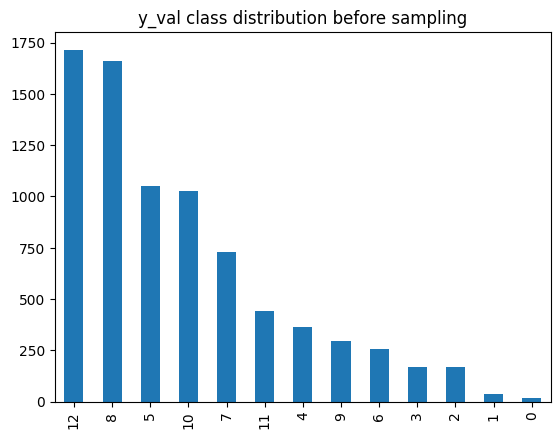

In [33]:
class_y = pd.Series(y_val).value_counts()
class_y.plot(kind='bar')
plt.title("y_val class distribution before sampling")
plt.show()

In [34]:
freq = pd.Series(y_train).value_counts()
freq

8     5060
12    5039
10    3149
5     3059
7     2296
11    1299
4     1051
9      920
6      801
2      487
3      442
1      103
0       69
Name: count, dtype: int64

In [35]:
freq1 = {}
freq2 = {}
for i,j in enumerate(freq):
    if(j<801):
        freq1[freq.index[i]]=800
    elif(j>3149):
        freq2[freq.index[i]]=3149
freq1,freq2

({2: 800, 3: 800, 1: 800, 0: 800}, {8: 3149, 12: 3149})

In [36]:
freq0 = pd.Series(y_val).value_counts()
freq0

12    1716
8     1662
5     1051
10    1024
7      727
11     442
4      365
9      296
6      258
3      166
2      166
1       36
0       16
Name: count, dtype: int64

In [37]:
freq11 = {}
freq22 = {}
for i,j in enumerate(freq0):
    if(j<300):
        freq11[freq0.index[i]]=300
    elif(j>1051):
        freq22[freq0.index[i]]=1051
freq11,freq22

({9: 300, 6: 300, 3: 300, 2: 300, 1: 300, 0: 300}, {12: 1051, 8: 1051})

In [38]:
# there are many ways to balance the classes, 
# 1) as there is high imbalance in our data, we will try class_weights and check whether it is yielding good results
# 2) oversampling using smote and undersampling using randomsampler

In [39]:
"""
from sklearn.utils.class_weight import compute_class_weight
class_weights = compute_class_weight(class_weight='balanced',classes=np.unique(y_train), y=y_train)
class_weights = dict(enumerate(class_weights))
"""

"\nfrom sklearn.utils.class_weight import compute_class_weight\nclass_weights = compute_class_weight(class_weight='balanced',classes=np.unique(y_train), y=y_train)\nclass_weights = dict(enumerate(class_weights))\n"

In [40]:
#oversampling using smote or Randomundersampler
#from imblearn.over_sampling import SMOTE

from imblearn.over_sampling import RandomOverSampler

oversample = RandomOverSampler(sampling_strategy=freq1, random_state=42)
X_res, y_res = oversample.fit_resample(x_train, y_train)

oversample1 = RandomOverSampler(sampling_strategy=freq11, random_state=42)
X_val, Y_val = oversample1.fit_resample(x_val,y_val) 

In [41]:
# Note: Don't use smote for generating data for sensual data like tokenized words, because generating synthetic data could be non-sensical 

In [42]:
from imblearn.under_sampling import RandomUnderSampler

undersample = RandomUnderSampler(sampling_strategy=freq2,random_state=42)
X_train_resampled, y_train_resampled = undersample.fit_resample(X_res, y_res)

undersample1 = RandomUnderSampler(sampling_strategy=freq22,random_state=42)
X_val_resampled, y_val_resampled = undersample1.fit_resample(X_val, Y_val) 

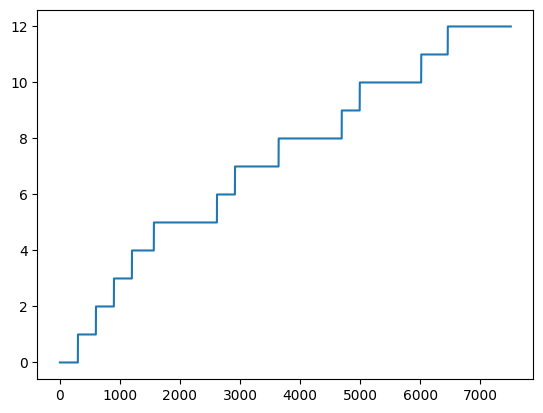

In [43]:
plt.plot(y_val_resampled)

In [44]:
from sklearn.utils import shuffle
X_train_resampled, y_train_resampled = shuffle(X_train_resampled,y_train_resampled,random_state=42)
X_val_resampled, y_val_resampled = shuffle(X_val_resampled, y_val_resampled,random_state=42)

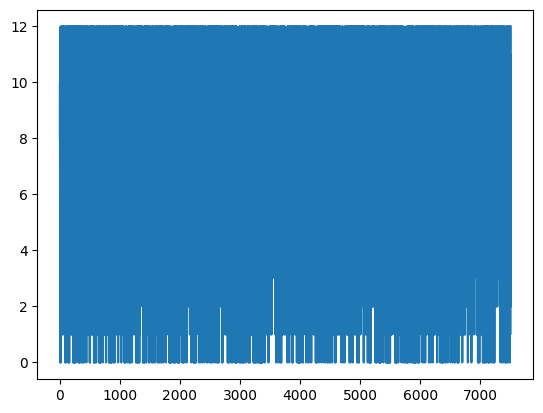

In [45]:
plt.plot(y_val_resampled)

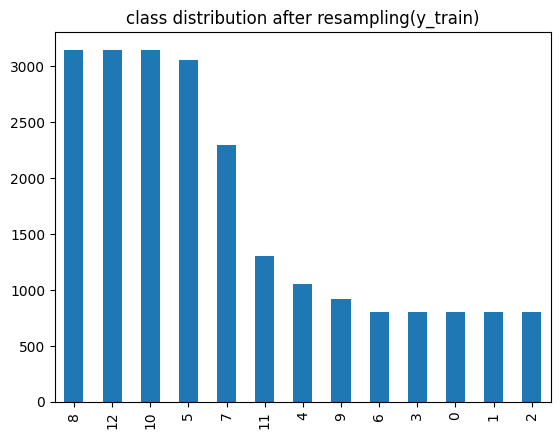

In [46]:
class_dist = pd.Series(y_train_resampled).value_counts()
class_dist.plot(kind='bar')
plt.title("class distribution after resampling(y_train)")
plt.show()

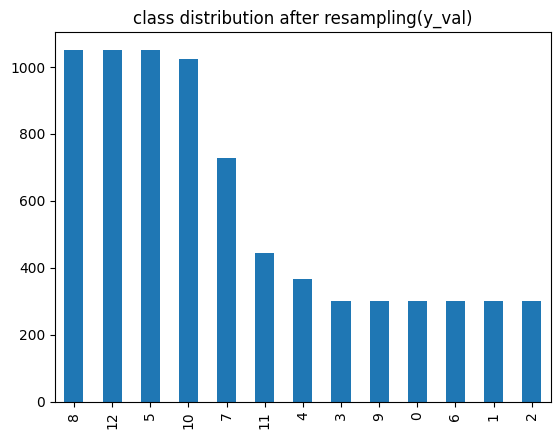

In [47]:
class_dist = pd.Series(y_val_resampled).value_counts()
class_dist.plot(kind='bar')
plt.title("class distribution after resampling(y_val)")
plt.show()

In [161]:
pd.Series(y_train_resampled).value_counts()

8     3149
12    3149
10    3149
5     3059
7     2296
11    1299
4     1051
9      920
6      801
3      800
0      800
1      800
2      800
Name: count, dtype: int64

In [162]:
pd.Series(y_val_resampled).value_counts() 

8     1051
12    1051
5     1051
10    1024
7      727
11     442
4      365
3      300
9      300
0      300
6      300
1      300
2      300
Name: count, dtype: int64

In [48]:
# largesample/samplesample = k
# if k>5, high imbalance
# if k<5, mild imbalance

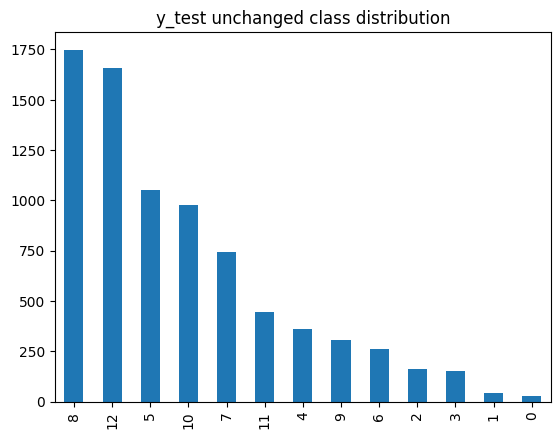

In [49]:
class_dist = pd.Series(y_test).value_counts()
class_dist.plot(kind='bar')
plt.title("y_test unchanged class distribution")
plt.show()

In [50]:
#Note: Generating more random samples may lead to overfitting

In [51]:
x_train.shape,X_train_resampled.shape # we observe there is an decrease or increase in the sample

((23775, 33), (22073, 33))

In [52]:
x_val.shape,X_val_resampled.shape # we observe there is an decrease or increase in the sample

((7925, 33), (7511, 33))

In [53]:
#Note: Oversampling more will lead to redundancy in the data which may leads to overfitting
# Becautious

In [54]:
#len(X_train_resampled)-len(np.unique(X_train_resampled,axis=0)),len(X_val_resampled)-len(np.unique(X_val_resampled,axis=0))
# this indicates there are duplicates in the array

In [55]:
df_train = pd.DataFrame(X_train_resampled)
df_train['emotion']=y_train_resampled
df_train 

,0,1,2,3,4,5,6,7,8,9,...,24,25,26,27,28,29,30,31,32,emotion
0,[name],Her,new,cd,is,lovely,<null>,<null>,<null>,<null>,...,<null>,<null>,<null>,<null>,<null>,<null>,<null>,<null>,<null>,5
1,[name],"lol,",I,know,how,you,"fel,",but,with,4,...,grow,things,<null>,<null>,<null>,<null>,<null>,<null>,<null>,8
2,I,seriously,hate,my,life,it's,curently,"242am,",I,have,...,<null>,<null>,<null>,<null>,<null>,<null>,<null>,<null>,<null>,12
3,[name],in,spoke,to,you,yesterday,and,u,didnt,respond,...,<null>,<null>,<null>,<null>,<null>,<null>,<null>,<null>,<null>,12
4,Your,the,suporter,its,totaly,up,to,you,<null>,<null>,...,<null>,<null>,<null>,<null>,<null>,<null>,<null>,<null>,<null>,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22068,[name],Now,there's,a,question,for,140,characters,One,of,...,<null>,<null>,<null>,<null>,<null>,<null>,<null>,<null>,<null>,8
22069,ARGH!,there,is,a,huge,spider,in,the,towel,"pile,",...,<null>,<null>,<null>,<null>,<null>,<null>,<null>,<null>,<null>,12
22070,starting,the,video,editing,of,the,first,spanking,movie,we,...,<null>,<null>,<null>,<null>,<null>,<null>,<null>,<null>,<null>,5
22071,is,boiling,in,the,"ofice,",air,con,any1,?,<null>,...,<null>,<null>,<null>,<null>,<null>,<null>,<null>,<null>,<null>,1


In [56]:
df_traino = df_train.drop_duplicates()
df_traino

,0,1,2,3,4,5,6,7,8,9,...,24,25,26,27,28,29,30,31,32,emotion
0,[name],Her,new,cd,is,lovely,<null>,<null>,<null>,<null>,...,<null>,<null>,<null>,<null>,<null>,<null>,<null>,<null>,<null>,5
1,[name],"lol,",I,know,how,you,"fel,",but,with,4,...,grow,things,<null>,<null>,<null>,<null>,<null>,<null>,<null>,8
2,I,seriously,hate,my,life,it's,curently,"242am,",I,have,...,<null>,<null>,<null>,<null>,<null>,<null>,<null>,<null>,<null>,12
3,[name],in,spoke,to,you,yesterday,and,u,didnt,respond,...,<null>,<null>,<null>,<null>,<null>,<null>,<null>,<null>,<null>,12
4,Your,the,suporter,its,totaly,up,to,you,<null>,<null>,...,<null>,<null>,<null>,<null>,<null>,<null>,<null>,<null>,<null>,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22067,Eating,Toast,Peanut,"Buter,Yum",<null>,<null>,<null>,<null>,<null>,<null>,...,<null>,<null>,<null>,<null>,<null>,<null>,<null>,<null>,<null>,8
22068,[name],Now,there's,a,question,for,140,characters,One,of,...,<null>,<null>,<null>,<null>,<null>,<null>,<null>,<null>,<null>,8
22069,ARGH!,there,is,a,huge,spider,in,the,towel,"pile,",...,<null>,<null>,<null>,<null>,<null>,<null>,<null>,<null>,<null>,12
22070,starting,the,video,editing,of,the,first,spanking,movie,we,...,<null>,<null>,<null>,<null>,<null>,<null>,<null>,<null>,<null>,5


In [57]:
df_val = pd.DataFrame(X_val_resampled)
df_val['emotion']=y_val_resampled
df_val

,0,1,2,3,4,5,6,7,8,9,...,24,25,26,27,28,29,30,31,32,emotion
0,[name],i,wish,i,was,home,in,bed,naked,<null>,...,<null>,<null>,<null>,<null>,<null>,<null>,<null>,<null>,<null>,8
1,[name],bye,selena!,to,bad,i,didnt,get,to,talk,...,<null>,<null>,<null>,<null>,<null>,<null>,<null>,<null>,<null>,10
2,[name],fine!,Going,to,do,my,big,walk,today,20,...,<null>,<null>,<null>,<null>,<null>,<null>,<null>,<null>,<null>,8
3,[name],Where,are,you,at,the,mo,Becks?,Guesing,it's,...,<null>,<null>,<null>,<null>,<null>,<null>,<null>,<null>,<null>,3
4,[name],thanks,for,viewing,my,portfolio,I'l,be,updating,it,...,<null>,<null>,<null>,<null>,<null>,<null>,<null>,<null>,<null>,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7506,SEe,waT,I,Mean,bOuT,FoL0w,fRiDaYs,It'S,cALed,LoSe,...,<null>,<null>,<null>,<null>,<null>,<null>,<null>,<null>,<null>,10
7507,didnt,enjoy,having,to,say,godbye,to,"alex,",v,emotional,...,<null>,<null>,<null>,<null>,<null>,<null>,<null>,<null>,<null>,10
7508,Is,anyone,else,having,a,bad,Friday?,Is,not,a,...,<null>,<null>,<null>,<null>,<null>,<null>,<null>,<null>,<null>,10
7509,I,forgot,to,complain,about,Southwest,not,doing,preboard,for,...,<null>,<null>,<null>,<null>,<null>,<null>,<null>,<null>,<null>,2


In [58]:
df_valo = df_val.drop_duplicates()
df_valo

,0,1,2,3,4,5,6,7,8,9,...,24,25,26,27,28,29,30,31,32,emotion
0,[name],i,wish,i,was,home,in,bed,naked,<null>,...,<null>,<null>,<null>,<null>,<null>,<null>,<null>,<null>,<null>,8
1,[name],bye,selena!,to,bad,i,didnt,get,to,talk,...,<null>,<null>,<null>,<null>,<null>,<null>,<null>,<null>,<null>,10
2,[name],fine!,Going,to,do,my,big,walk,today,20,...,<null>,<null>,<null>,<null>,<null>,<null>,<null>,<null>,<null>,8
3,[name],Where,are,you,at,the,mo,Becks?,Guesing,it's,...,<null>,<null>,<null>,<null>,<null>,<null>,<null>,<null>,<null>,3
4,[name],thanks,for,viewing,my,portfolio,I'l,be,updating,it,...,<null>,<null>,<null>,<null>,<null>,<null>,<null>,<null>,<null>,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7505,"Wel,",there,goes,that,shirt,Haha,<null>,<null>,<null>,<null>,...,<null>,<null>,<null>,<null>,<null>,<null>,<null>,<null>,<null>,8
7506,SEe,waT,I,Mean,bOuT,FoL0w,fRiDaYs,It'S,cALed,LoSe,...,<null>,<null>,<null>,<null>,<null>,<null>,<null>,<null>,<null>,10
7507,didnt,enjoy,having,to,say,godbye,to,"alex,",v,emotional,...,<null>,<null>,<null>,<null>,<null>,<null>,<null>,<null>,<null>,10
7508,Is,anyone,else,having,a,bad,Friday?,Is,not,a,...,<null>,<null>,<null>,<null>,<null>,<null>,<null>,<null>,<null>,10


In [59]:
indexo = list(df_traino.index)
indexa = list(df_train.index)
indexd = []
for i in indexa:
    if(i not in indexo):
        indexd.append(i)

indexov = list(df_valo.index)
indexav = list(df_val.index)
indexdv = []
for i in indexav:
    if(i not in indexov):
        indexdv.append(i)

In [60]:
len(indexd),len(indexdv)

(2099, 862)

In [61]:
df_traind = df_train.iloc[indexd]
df_traind

,0,1,2,3,4,5,6,7,8,9,...,24,25,26,27,28,29,30,31,32,emotion
172,Just,found,out,my,parents,are,puting,down,my,dog,...,<null>,<null>,<null>,<null>,<null>,<null>,<null>,<null>,<null>,0
251,Internet,is,painfuly,slow,today,<null>,<null>,<null>,<null>,<null>,...,<null>,<null>,<null>,<null>,<null>,<null>,<null>,<null>,<null>,0
568,[name],I,used,to,be,but,that,was,a,while,...,<null>,<null>,<null>,<null>,<null>,<null>,<null>,<null>,<null>,0
604,aw,now,where's,that,litle,asian,girl,who,runs,round,...,<null>,<null>,<null>,<null>,<null>,<null>,<null>,<null>,<null>,1
605,Internet,is,painfuly,slow,today,<null>,<null>,<null>,<null>,<null>,...,<null>,<null>,<null>,<null>,<null>,<null>,<null>,<null>,<null>,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22042,God,morning,my,sexy,twiter,how's,yal,doing?,I'm,gd,...,<null>,<null>,<null>,<null>,<null>,<null>,<null>,<null>,<null>,3
22044,i,hav,a,chance,to,win,10,i,was,given,...,if,i,won,anythin!?!,<null>,<null>,<null>,<null>,<null>,0
22045,Masive,morning,I'm,stufed,now,<null>,<null>,<null>,<null>,<null>,...,<null>,<null>,<null>,<null>,<null>,<null>,<null>,<null>,<null>,3
22057,[name],"yes,",bo,for,soar,throats,and,earaches!,<null>,<null>,...,<null>,<null>,<null>,<null>,<null>,<null>,<null>,<null>,<null>,0


In [62]:
df_traind.value_counts()

0           1       2           3      4        5       6         7         8              9       10      11        12      13      14      15      16      17      18        19      20      21       22      23      24      25      26      27      28      29      30      31      32      emotion
quotlocked  up      abroadquot  makes  bein     half    brown     god       risk           mgmt    when    travelin  3rd     world   i       blend   i       fel     sory      for     my      hostage  magnet  white   pepo    <null>  <null>  <null>  <null>  <null>  <null>  <null>  <null>  0          21
[name]      [name]  your        not    talking  about   your      obsesion  with           me      right?  <null>    <null>  <null>  <null>  <null>  <null>  <null>  <null>    <null>  <null>  <null>   <null>  <null>  <null>  <null>  <null>  <null>  <null>  <null>  <null>  <null>  <null>  0          19
            yup!    Now         I      can      join    in        on        the            nin     a

In [63]:
df_vald = df_val.iloc[indexdv]
df_vald

,0,1,2,3,4,5,6,7,8,9,...,24,25,26,27,28,29,30,31,32,emotion
61,[name],bo,<null>,<null>,<null>,<null>,<null>,<null>,<null>,<null>,...,<null>,<null>,<null>,<null>,<null>,<null>,<null>,<null>,<null>,1
139,listening,to,faith,spirituality,and,the,internet,<null>,<null>,<null>,...,<null>,<null>,<null>,<null>,<null>,<null>,<null>,<null>,<null>,3
156,[name],Murphy's,Law?,Sory,that,your,computer,is,not,coperating,...,<null>,<null>,<null>,<null>,<null>,<null>,<null>,<null>,<null>,0
193,[name],bo,<null>,<null>,<null>,<null>,<null>,<null>,<null>,<null>,...,<null>,<null>,<null>,<null>,<null>,<null>,<null>,<null>,<null>,1
227,someone,WOULD,give,a,spech,about,loved,ones,in,the,...,<null>,<null>,<null>,<null>,<null>,<null>,<null>,<null>,<null>,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7482,Ian,is,waiting,for,a,very,important,pic,<null>,<null>,...,<null>,<null>,<null>,<null>,<null>,<null>,<null>,<null>,<null>,3
7490,[name],I,have,a,2nd,monitor,I,could,use,but,...,have,the,"rom,",sure,hope,so!,<null>,<null>,<null>,2
7493,[name],Every,time,I,suced,with,a,"code,",I,get,...,<null>,<null>,<null>,<null>,<null>,<null>,<null>,<null>,<null>,0
7501,[name],thats,another,sponsor,<null>,<null>,<null>,<null>,<null>,<null>,...,<null>,<null>,<null>,<null>,<null>,<null>,<null>,<null>,<null>,1


In [64]:
df_vald.value_counts()

0       1         2         3           4       5       6          7         8       9           10         11      12      13      14       15      16      17        18      19      20          21      22      23      24      25      26      27      28      29      30      31      32      emotion
[name]  Murphy's  Law?      Sory        that    your    computer   is        not     coperating  when       you     have    lots    of       work    My      kids      are     <null>  <null>      <null>  <null>  <null>  <null>  <null>  <null>  <null>  <null>  <null>  <null>  <null>  <null>  0          29
        smh       Your      whin        with    that    coment     <null>    <null>  <null>      <null>     <null>  <null>  <null>  <null>   <null>  <null>  <null>    <null>  <null>  <null>      <null>  <null>  <null>  <null>  <null>  <null>  <null>  <null>  <null>  <null>  <null>  <null>  0          23
        Every     time      I           suced   with    a          code,     I       get   

In [65]:
# now we found duplicate data from the resampled data
# And we will be applying augumentation techniques to it, to maintain the variability in the data

In [66]:
X_train_resampled_dup = df_traind.iloc[:,:-1].values.tolist()
y_train_resampled_dup = df_traind.iloc[:,-1]
X_val_resampled_dup = df_vald.iloc[:,:-1].values.tolist()
y_val_resampled_dup = df_vald.iloc[:,-1]

In [67]:
# leave them as numpy array
X_train_resampled_o = df_traino.iloc[:,:-1]
y_train_resampled_o = df_traino.iloc[:,-1]
X_val_resampled_o = df_valo.iloc[:,:-1]
y_val_resampled_o = df_valo.iloc[:,-1]

In [68]:
print(len(X_train_resampled_o),"+",len(X_train_resampled_dup),len(X_train_resampled))
print(len(y_train_resampled_o),"+",len(y_train_resampled_dup),len(y_train_resampled))
print(len(X_val_resampled_o),"+",len(X_val_resampled_dup),len(X_val_resampled))
print(len(y_val_resampled_o),"+",len(y_val_resampled_dup),len(y_val_resampled))

19974 + 2099 22073
19974 + 2099 22073
6649 + 862 7511
6649 + 862 7511


In [69]:
# Now our data looks kinda balanced

# Note: the highest classes frequency shouldn't be more than 5 times more than the lowest class frequency, otherwise it is high imbalance, 
# >5 high imbalance,<5 moderate imbalance, <3 balance

In [70]:
# As we see there is lot of increase in the sample, as random samples increase the size the duplicating the data
# So, to mitigate it, we will do data agumentation like replacing the words with similar meaning word to increase the variablility in the data

### Data Agumentation (only for duplicate data)

In [71]:
import nltk
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\vivek\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\vivek\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [72]:
from nltk.corpus import wordnet
import random
word = 'happy'
synonyms = wordnet.synsets(word)
synonyms

[Synset('happy.a.01'),
 Synset('felicitous.s.02'),
 Synset('glad.s.02'),
 Synset('happy.s.04')]

In [73]:
# Replacing the words with thier synonyms

In [74]:
from nltk.corpus import wordnet
import random


# method1 (manually replacing words using nltk)

exceptions = ['an','An','be','Be','in','In','am','Am','a','A','it','It','i','I','as','As']
def augument(words):
    lii = []
    for word in words:
        li =[]
        synonyms = wordnet.synsets(word)
        if(len(synonyms)!=0 and word not in exceptions):
            for i in range(len(synonyms)):
                synonym = synonyms[i].lemmas()[0].name()
                if(synonym!=word):
                    li.append(synonym)
            if(len(li)!=0):
                lii.append(random.choice(li)) 
            else: lii.append(word)
        else:
            lii.append(word)
    return lii


"""
# method2 (using nlpaug library)
import nlpaug.augmenter.word as naw
import nltk
nltk.download('averaged_perceptron_tagger_eng')
#Initialize the augmenter for synonym replacement
stopwords = ['an','An','be','Be','in','In','am','Am','a','A','it','It','i','I','as','As','<null>','[name]']
synonym_aug = naw.SynonymAug(aug_src='wordnet',stopwords=stopwords)

def augument(words):
    str = " ".join(words)
    syn = synonym_aug.augment(str)
    return syn[0].split()
"""

x_train_augument = []
x_val_augument = []
for i in range(len(X_train_resampled_dup)):
    tempx = augument(X_train_resampled_dup[i])
    x_train_augument.append(tempx)
    
for i in range(len(X_val_resampled_dup)):
    tempxv = augument(X_val_resampled_dup[i])
    x_val_augument.append(tempxv)

In [75]:
len(x_train_augument),len(x_val_augument)

(2099, 862)

In [76]:
# Repeating synonymn replacement

x_train_augument1 = []
x_val_augument1 = []
for i in range(len(x_train_augument)):
    tempx = augument(x_train_augument[i])
    x_train_augument1.append(tempx)
    
for i in range(len(x_val_augument)):
    tempxv = augument(x_val_augument[i])
    x_val_augument1.append(tempxv)

In [77]:
"""
insertion_aug = naw.ContextualWordEmbsAug(action="insert",model_path='bert-base-uncased',top_k=5,stopwords=stopwords)
sample = insertion_aug.augment("i love eating mushrooms and samosas in theb ")
sample
"""

'\ninsertion_aug = naw.ContextualWordEmbsAug(action="insert",model_path=\'bert-base-uncased\',top_k=5,stopwords=stopwords)\nsample = insertion_aug.augment("i love eating mushrooms and samosas in theb ")\nsample\n'

In [78]:
"""
import re
import concurrent.futures
import nlpaug.augmenter.word as naw

# Define the augmentation and cleaning function
def augment_and_clean(sentence):
    augmented_sentence = insertion_aug.augment(" ".join(sentence))
    return func(augmented_sentence[0])[0].split()

def func(x):
    li = []
    x = re.sub(r'([?!.,])\1+', r'\1', x)
    x = re.sub(r'[^a-zA-Z0-9\s\!\?\,\@\']','',x)
    x = re.sub(r'\w*null | tested |\s*test| \s*non','',x)
    x = re.sub(r'\s*UNK',' [name]',x)
    li.append(x)
    return li

# List of sentences to augment
x_train_augument1 = []

# Run in parallel with a thread pool
with concurrent.futures.ThreadPoolExecutor(max_workers=5) as executor:
    results = list(executor.map(augment_and_clean, x_train_augument))

x_train_augument1.extend(results)
"""

'\nimport re\nimport concurrent.futures\nimport nlpaug.augmenter.word as naw\n\n# Define the augmentation and cleaning function\ndef augment_and_clean(sentence):\n    augmented_sentence = insertion_aug.augment(" ".join(sentence))\n    return func(augmented_sentence[0])[0].split()\n\ndef func(x):\n    li = []\n    x = re.sub(r\'([?!.,])\x01+\', r\'\x01\', x)\n    x = re.sub(r\'[^a-zA-Z0-9\\s\\!\\?\\,\\@\']\',\'\',x)\n    x = re.sub(r\'\\w*null | tested |\\s*test| \\s*non\',\'\',x)\n    x = re.sub(r\'\\s*UNK\',\' [name]\',x)\n    li.append(x)\n    return li\n\n# List of sentences to augment\nx_train_augument1 = []\n\n# Run in parallel with a thread pool\nwith concurrent.futures.ThreadPoolExecutor(max_workers=5) as executor:\n    results = list(executor.map(augment_and_clean, x_train_augument))\n\nx_train_augument1.extend(results)\n'

In [79]:
# swapping the words 

In [80]:
import nlpaug.augmenter.word as naw

def custom_tokenizer(text):
    # Merge contractions
    text = re.sub(r"(\w)'(\w)", r"\1'\2", text)
    text = re.sub(r'\[name]','[name]',text)
    tokens = text.split()
    return tokens
    
swap_aug = naw.RandomWordAug(action="swap",tokenizer=custom_tokenizer)
swap_aug.augment("i [name] love eating mushrooms and samosas in the beach and it's very hot ")

c:\Users\vivek\AppData\Local\Programs\Python\Python311\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


["Love I [name] eating mushrooms and samosas the in and beach very it's hot"]

In [81]:
# swapping the words in the sentences for more variability

def swap(sentences):
    ll =[]
    for words in sentences:
        str=""
        for i,j in enumerate(words):
            if(i==0):
                str+=j
            else:
                if(j!='<null>'):
                    str+=" "+j
                else: break 
        ss=swap_aug.augment(str)
        ss = ss[0]
        ll.append(ss.split())
    return ll

x_train_augument1 = swap(x_train_augument1)
x_val_augument1 = swap(x_val_augument1)

In [82]:
# swapping agian 
x_train_augument1 = swap(x_train_augument1)
x_val_augument1= swap(x_val_augument1)

In [83]:
print(x_train_augument[100])

['[name]', '[name]', 'your', 'not', 'talk', 'approximately', 'your', 'obsesion', 'with', 'Maine', 'right?', '<null>', '<null>', '<null>', '<null>', '<null>', '<null>', '<null>', '<null>', '<null>', '<null>', '<null>', '<null>', '<null>', '<null>', '<null>', '<null>', '<null>', '<null>', '<null>', '<null>', '<null>', '<null>']


In [84]:
print(x_train_augument1[100])

['Your', '[name]', '[name]', 'not', 'your', 'spill_the_beans', 'approximately', 'with', 'obsesion', 'right?', 'Maine']


In [85]:
print(x_val_augument[12])

['[name]', "Murphy's", 'Law?', 'Sory', 'that', 'your', 'calculator', 'be', 'not', 'coperating', 'when', 'you', 'experience', 'distribute', 'of', 'study', 'My', 'Kyd', 'be', '<null>', '<null>', '<null>', '<null>', '<null>', '<null>', '<null>', '<null>', '<null>', '<null>', '<null>', '<null>', '<null>', '<null>']


In [86]:
print(x_val_augument1[12])

['[name]', 'Law?', "Murphy's", 'that', 'Sory', 'be', 'your', 'calculator', 'not', 'coperating', 'you', 'when', 'circulate', 'have', 'My', 'of', 'be', 'discipline', 'Kyd']


In [87]:
x_train_augument1 = [i + ['<null>']*(len(x_train_augument[0])-len(i)) for i in x_train_augument1]
x_val_augument1 = [i + ['<null>']*(len(x_val_augument[0])-len(i)) for i in x_val_augument1]

In [88]:
# reframing them to dataframe to see the value_counts

In [89]:
len(x_train_augument1),len(y_train_resampled_dup)

(2099, 2099)

In [90]:
len(x_val_augument1),len(y_val_resampled_dup)

(862, 862)

In [91]:
df_train_final = pd.DataFrame(x_train_augument1)
df_train_final['emotion'] = list(y_train_resampled_dup)
df_val_final = pd.DataFrame(x_val_augument1)
df_val_final['emotion']=  list(y_val_resampled_dup)

In [92]:
df_train_final.head()

,0,1,2,3,4,5,6,7,8,9,...,24,25,26,27,28,29,30,31,32,emotion
0,knocked_out,precisely,spectator,my,peer,rear,my,invest,dash_off,overturn,...,<null>,<null>,<null>,<null>,<null>,<null>,<null>,<null>,<null>,0
1,be,numb,painfuly,internet,present,<null>,<null>,<null>,<null>,<null>,...,<null>,<null>,<null>,<null>,<null>,<null>,<null>,<null>,<null>,0
2,I,[name],manipulation,to,merely,be,be,that,a,ago,...,<null>,<null>,<null>,<null>,<null>,<null>,<null>,<null>,<null>,0
3,Where's,aw,immediately,that,Asian,litle,World_Health_Organization,girlfriend,lap,starting_signal,...,<null>,<null>,<null>,<null>,<null>,<null>,<null>,<null>,<null>,1
4,internet,price,present,painfuly,boring,<null>,<null>,<null>,<null>,<null>,...,<null>,<null>,<null>,<null>,<null>,<null>,<null>,<null>,<null>,0


In [93]:
df_train_final.value_counts().head(5)

0               1              2        3       4       5       6       7       8       9       10      11      12      13      14      15      16      17      18      19      20      21      22      23      24      25      26      27      28      29      30      31      32      emotion
Confuzled       <null>         <null>   <null>  <null>  <null>  <null>  <null>  <null>  <null>  <null>  <null>  <null>  <null>  <null>  <null>  <null>  <null>  <null>  <null>  <null>  <null>  <null>  <null>  <null>  <null>  <null>  <null>  <null>  <null>  <null>  <null>  <null>  0          11
sleep_together  rest           in       <null>  <null>  <null>  <null>  <null>  <null>  <null>  <null>  <null>  <null>  <null>  <null>  <null>  <null>  <null>  <null>  <null>  <null>  <null>  <null>  <null>  <null>  <null>  <null>  <null>  <null>  <null>  <null>  <null>  <null>  0           7
Fuckin'm        transtelecom   <null>   <null>  <null>  <null>  <null>  <null>  <null>  <null>  <null>  <null>  <null>  <nul

In [94]:
temp11 = np.array(df_train_final[df_train_final[0]=='Confuzled'].head(1))
temp5 = np.array(df_train_final[df_train_final[0]=="Fuckin'm"].head(1))
temp11,temp5

(array([['Confuzled', '<null>', '<null>', '<null>', '<null>', '<null>',
         '<null>', '<null>', '<null>', '<null>', '<null>', '<null>',
         '<null>', '<null>', '<null>', '<null>', '<null>', '<null>',
         '<null>', '<null>', '<null>', '<null>', '<null>', '<null>',
         '<null>', '<null>', '<null>', '<null>', '<null>', '<null>',
         '<null>', '<null>', '<null>', 0]], dtype=object),
 array([["Fuckin'm", 'transtelecom', '<null>', '<null>', '<null>',
         '<null>', '<null>', '<null>', '<null>', '<null>', '<null>',
         '<null>', '<null>', '<null>', '<null>', '<null>', '<null>',
         '<null>', '<null>', '<null>', '<null>', '<null>', '<null>',
         '<null>', '<null>', '<null>', '<null>', '<null>', '<null>',
         '<null>', '<null>', '<null>', '<null>', 0]], dtype=object))

In [95]:
df_train_final = df_train_final[df_train_final[0]!='Confuzled']
df_train_final = df_train_final[df_train_final[0]!="Fuckin'm"]

In [96]:
df_train_final.value_counts().head()

0               1                       2             3        4       5       6       7       8       9       10      11      12      13      14      15      16      17      18      19      20      21      22      23      24      25      26      27      28      29      30      31      32      emotion
sleep_together  rest                    in            <null>   <null>  <null>  <null>  <null>  <null>  <null>  <null>  <null>  <null>  <null>  <null>  <null>  <null>  <null>  <null>  <null>  <null>  <null>  <null>  <null>  <null>  <null>  <null>  <null>  <null>  <null>  <null>  <null>  <null>  0          7
[name]          flicitations!           <null>        <null>   <null>  <null>  <null>  <null>  <null>  <null>  <null>  <null>  <null>  <null>  <null>  <null>  <null>  <null>  <null>  <null>  <null>  <null>  <null>  <null>  <null>  <null>  <null>  <null>  <null>  <null>  <null>  <null>  <null>  3          3
                curse                   hordies       <null>   <null>  <null>  <n

In [97]:
df_train_final = pd.concat([df_train_final,pd.DataFrame(temp11,columns=df_train_final.columns)])
df_train_final = pd.concat([df_train_final,pd.DataFrame(temp5,columns=df_train_final.columns)])

In [98]:
len(df_train_final)

2085

In [99]:
len(df_val_final)

862

In [100]:
df_val_final.value_counts().head()

0           1       2                 3       4             5       6          7        8         9           10      11      12      13      14       15      16      17      18      19      20      21      22      23      24      25      26      27      28      29      30      31      32      emotion
MOtherfuck  QW      <null>            <null>  <null>        <null>  <null>     <null>   <null>    <null>      <null>  <null>  <null>  <null>  <null>   <null>  <null>  <null>  <null>  <null>  <null>  <null>  <null>  <null>  <null>  <null>  <null>  <null>  <null>  <null>  <null>  <null>  <null>  0          18
[name]      bo      <null>            <null>  <null>        <null>  <null>     <null>   <null>    <null>      <null>  <null>  <null>  <null>  <null>   <null>  <null>  <null>  <null>  <null>  <null>  <null>  <null>  <null>  <null>  <null>  <null>  <null>  <null>  <null>  <null>  <null>  <null>  1          17
deadlines!  <null>  <null>            <null>  <null>        <null>  <null>     

In [101]:
temp12 = np.array(df_val_final[df_val_final[0]=='MOtherfuck'].head(1))
temp52 = np.array(df_val_final[df_val_final[1]=="bo"].head(1))
temp12,temp52

(array([['MOtherfuck', 'QW', '<null>', '<null>', '<null>', '<null>',
         '<null>', '<null>', '<null>', '<null>', '<null>', '<null>',
         '<null>', '<null>', '<null>', '<null>', '<null>', '<null>',
         '<null>', '<null>', '<null>', '<null>', '<null>', '<null>',
         '<null>', '<null>', '<null>', '<null>', '<null>', '<null>',
         '<null>', '<null>', '<null>', 0]], dtype=object),
 array([['[name]', 'bo', '<null>', '<null>', '<null>', '<null>', '<null>',
         '<null>', '<null>', '<null>', '<null>', '<null>', '<null>',
         '<null>', '<null>', '<null>', '<null>', '<null>', '<null>',
         '<null>', '<null>', '<null>', '<null>', '<null>', '<null>',
         '<null>', '<null>', '<null>', '<null>', '<null>', '<null>',
         '<null>', '<null>', 1]], dtype=object))

In [102]:
df_val_final = df_val_final[df_val_final[0]!='MOtherfuck']
df_val_final = df_val_final[df_val_final[1]!="bo"]

In [103]:
df_val_final.value_counts().head()

0           1       2                 3             4        5          6          7       8              9              10        11      12         13        14         15      16         17                   18      19      20        21                      22      23      24      25      26      27      28      29      30      31      32      emotion
deadlines!  <null>  <null>            <null>        <null>   <null>     <null>     <null>  <null>         <null>         <null>    <null>  <null>     <null>    <null>     <null>  <null>     <null>               <null>  <null>  <null>    <null>                  <null>  <null>  <null>  <null>  <null>  <null>  <null>  <null>  <null>  <null>  <null>  2          3
a           kickas  hold              sidereal_day  of       Fulani     Seaworld,  arrest  fifteen        honest-to-god  classify  guys,   XMen       and       beginning  day?    succeed    <null>               <null>  <null>  <null>    <null>                  <null>  <null>  <nul

In [104]:
df_val_final = pd.concat([df_val_final,pd.DataFrame(temp12,columns=df_val_final.columns)])
df_val_final = pd.concat([df_val_final,pd.DataFrame(temp52,columns=df_val_final.columns)])

In [105]:
len(df_val_final)

829

In [106]:
# Now we can see that there are all unique values, no duplicacy is found in the data

In [107]:
xtarg = df_train_final.iloc[:,:-1].values
ytarg = df_train_final.iloc[:,-1].values
xvarg = df_val_final.iloc[:,:-1].values
yvarg = df_val_final.iloc[:,-1].values

In [108]:
print(X_train_resampled_o.shape,xtarg.shape)
print(y_train_resampled_o.shape,ytarg.shape)
print(X_val_resampled_o.shape,xvarg.shape)
print(y_val_resampled_o.shape,yvarg.shape) 

(19974, 33) (2085, 33)
(19974,) (2085,)
(6649, 33) (829, 33)
(6649,) (829,)


In [109]:
X_train_resampled_m=np.vstack([X_train_resampled_o,xtarg])
y_train_resampled_m = np.hstack([y_train_resampled_o,ytarg])
X_val_resampled_m = np.vstack([X_val_resampled_o,xvarg])
y_val_resampled_m = np.hstack([y_val_resampled_o,yvarg])

In [110]:
y_train_resampled_m

array([5, 8, 12, ..., 1, 0, 0], dtype=object)

In [111]:
print(x_train.shape,y_train.shape)
print(x_val.shape,y_val.shape)

(23775, 33) (23775,)
(7925, 33) (7925,)


In [112]:
print(X_train_resampled_m.shape,y_train_resampled_m.shape)
print(X_val_resampled_m.shape,y_val_resampled_m.shape)

(22059, 33) (22059,)
(7478, 33) (7478,)


In [113]:
def arraytolist(arr):
    li =[]
    for i in arr:
        li.append(list(i))
    return li

Xtl = arraytolist(X_train_resampled_m)
xvl = arraytolist(X_val_resampled_m)
xl = arraytolist(x_test)

In [114]:
z =[]
z.extend(Xtl)
z.extend(xvl)
z.extend(xl)
len(z)

37463

In [115]:
print(z[0])

['[name]', 'Her', 'new', 'cd', 'is', 'lovely', '<null>', '<null>', '<null>', '<null>', '<null>', '<null>', '<null>', '<null>', '<null>', '<null>', '<null>', '<null>', '<null>', '<null>', '<null>', '<null>', '<null>', '<null>', '<null>', '<null>', '<null>', '<null>', '<null>', '<null>', '<null>', '<null>', '<null>']


In [116]:
from tensorflow.keras.preprocessing.text import Tokenizer
tokenizer = Tokenizer()
tokenizer.fit_on_texts(z)
encoded = tokenizer.texts_to_sequences(z)

In [117]:
print(encoded[0])

[2, 99, 73, 1310, 14, 435, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


In [118]:
tokenizer.word_index.items()

dict_items([('<null>', 1), ('[name]', 2), ('i', 3), ('to', 4), ('the', 5), ('a', 6), ('my', 7), ('and', 8), ('you', 9), ('it', 10), ('of', 11), ('in', 12), ('for', 13), ('is', 14), ('so', 15), ('on', 16), ('have', 17), ('that', 18), ('be', 19), ('me', 20), ("i'm", 21), ('but', 22), ('with', 23), ('just', 24), ('not', 25), ('at', 26), ('was', 27), ('day', 28), ('this', 29), ('god', 30), ('al', 31), ('get', 32), ('out', 33), ('now', 34), ('your', 35), ('like', 36), ("it's", 37), ('up', 38), ('are', 39), ('no', 40), ('love', 41), ('go', 42), ('got', 43), ('do', 44), ('im', 45), ('going', 46), ('hapy', 47), ('from', 48), ('work', 49), ('lol', 50), ("don't", 51), ('today', 52), ('we', 53), ('what', 54), ('realy', 55), ('wil', 56), ('about', 57), ('u', 58), ('one', 59), ('back', 60), ('am', 61), ('time', 62), ('as', 63), ('know', 64), ('when', 65), ('se', 66), ("can't", 67), ('its', 68), ('if', 69), ('had', 70), ('can', 71), ('some', 72), ('new', 73), ('how', 74), ('there', 75), ('stil', 76)

In [119]:
vocab_size = len(tokenizer.word_index)+1
vocab_size # so, we have vocab_size unique words in our all combined sequence

37194

In [120]:
# after NER and augumentation, the number of unique words reduced from to 37480 , which significantly reduces overfitting of the model
# and good scope for generalization

### word vectors

In [121]:
# we will be using pretrained Glove to create word vectors for our sequences
# the file is downloaded locally, and we will find the corressponding word vector by mapping our words with it

In [122]:
# Load the GloVe embeddings
"""
import numpy as np
embedding_index = {}
embedding_dim = 100  # Dimension of the GloVe embeddings, adjust based on the complexity of the task and no.of words,sentences

with open('D:/ds/dl/rnn/archive/glove.6B.100d.txt', encoding="utf8") as f:
    for line in f:
        values = line.split()
        word = values[0]
        coefs = np.asarray(values[1:], dtype='float32')
        embedding_index[word] = coefs

# Create the embedding matrix
embedding_matrix = np.zeros((vocab_size, embedding_dim))
for word, i in tokenizer.word_index.items():
    embedding_vector = embedding_index.get(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector

print("Embedding matrix shape:", embedding_matrix.shape) 
"""

'\nimport numpy as np\nembedding_index = {}\nembedding_dim = 100  # Dimension of the GloVe embeddings, adjust based on the complexity of the task and no.of words,sentences\n\nwith open(\'D:/ds/dl/rnn/archive/glove.6B.100d.txt\', encoding="utf8") as f:\n    for line in f:\n        values = line.split()\n        word = values[0]\n        coefs = np.asarray(values[1:], dtype=\'float32\')\n        embedding_index[word] = coefs\n\n# Create the embedding matrix\nembedding_matrix = np.zeros((vocab_size, embedding_dim))\nfor word, i in tokenizer.word_index.items():\n    embedding_vector = embedding_index.get(word)\n    if embedding_vector is not None:\n        embedding_matrix[i] = embedding_vector\n\nprint("Embedding matrix shape:", embedding_matrix.shape) \n'

In [123]:
# we will be using word2vec to train on our custom words and generate word vectors
# because glove may not containa all the word vectors, where the words will be unique to our data 

In [124]:
print(z[5])

['[name]', 'aw', '<null>', '<null>', '<null>', '<null>', '<null>', '<null>', '<null>', '<null>', '<null>', '<null>', '<null>', '<null>', '<null>', '<null>', '<null>', '<null>', '<null>', '<null>', '<null>', '<null>', '<null>', '<null>', '<null>', '<null>', '<null>', '<null>', '<null>', '<null>', '<null>', '<null>', '<null>']


In [125]:
from gensim.models import Word2Vec

# Initialize and train the Word2Vec model
# Here, `size` is the embedding dimension, and `window` is the context window size
model = Word2Vec(sentences=z, vector_size=300, window=5, min_count=1, workers=4)

# Save the model for later use
model.save("word2vec.model")

In [126]:
#sample
model = Word2Vec.load("word2vec.model")
word_vector = model.wv["hi"]
word_vector

array([-2.64998265e-02,  9.00682062e-02, -1.15935847e-01, -1.19189344e-01,
        6.45691827e-02,  1.53096886e-02,  6.34499863e-02,  1.91032752e-01,
        2.22614389e-02, -8.62524062e-02,  6.44557998e-02, -4.85893041e-02,
       -6.84698373e-02, -7.66024813e-02,  1.31729320e-02, -5.61338617e-03,
        5.70741855e-02, -3.79219465e-02,  1.08059123e-01,  8.64508301e-02,
       -2.39220008e-01,  1.66403651e-01, -1.11726150e-01,  1.51459500e-01,
       -1.56749878e-02, -1.88761260e-02, -2.00486943e-01, -1.68472871e-01,
        8.75860304e-02, -2.49574129e-02,  2.44807020e-01,  7.66681507e-02,
       -4.85228002e-02,  1.48651093e-01,  1.08832769e-01,  1.33425787e-01,
        3.79705131e-02, -4.67012525e-02, -5.41222468e-02, -1.09284483e-02,
        7.99422190e-02, -4.06856509e-03,  1.98569566e-01, -3.96673344e-02,
       -4.35555428e-02,  4.10663784e-02,  1.67484760e-01, -7.15444461e-02,
       -7.64693245e-02,  1.37169689e-01,  2.41083145e-01,  1.36771232e-01,
        2.26184428e-02, -

In [127]:
len(word_vector)

300

In [128]:
import random
embedding_matrix = np.zeros((vocab_size, 300))
model = Word2Vec.load("word2vec.model")
for i,ind in tokenizer.word_index.items():
    try:
        embedding_matrix[ind]=model.wv[i] 
    except:
        random_floats = [random.uniform(-3, 3) for i in range(300)]
        embedding_matrix[ind]=random_floats
embedding_matrix 

array([[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 2.36466751e-01,  2.59965330e-01,  4.86287288e-02, ...,
        -1.17755331e-01,  1.93474889e-01,  5.91390789e-01],
       [-8.50880623e-01,  1.14092135e+00,  1.48323223e-01, ...,
        -1.61605430e+00, -6.63982630e-01, -2.65051574e-01],
       ...,
       [-1.32389214e+00, -1.46661433e+00,  1.58684046e+00, ...,
        -8.88231214e-01, -8.25296866e-01,  1.92306843e+00],
       [-2.76246296e+00,  1.49596421e+00,  2.32695876e+00, ...,
         4.67630392e-01, -1.87478089e+00, -2.34009069e+00],
       [-2.57958658e-03, -2.66528246e-03,  6.59899611e-04, ...,
         2.41361023e-03,  8.43549892e-03, -8.14570207e-03]])

In [129]:
embedding_matrix.shape

(37194, 300)

In [130]:
# the word vectors in embedded matrix are also stored in the same order as word_index 

In [131]:
len(encoded)

37463

In [132]:
l1= len(Xtl)
l2 = len(xvl)
l1,l2

(22059, 7478)

In [133]:
ll = l1+l2
ll

29537

In [134]:
ll-l2 

22059

In [135]:
len(encoded)-ll # y_test length

7926

In [136]:
x_train_final = encoded[:l1]
x_val_final = encoded[l1:ll]

In [137]:
x_train_final = np.array(x_train_final)
x_val_final = np.array(x_val_final)

In [138]:
from tensorflow.keras.utils import to_categorical
y_train_hot = to_categorical(y_train_resampled_m,num_classes=13)
y_test_hot = to_categorical(y_test,num_classes=13)
y_val_hot = to_categorical(y_val_resampled_m,num_classes=13)
y_train_hot.shape,y_val_hot.shape ,y_test_hot.shape

((22059, 13), (7478, 13), (7926, 13))

In [139]:
print(x_train_final.shape,y_train_hot.shape)
print(x_val_final.shape,y_val_hot.shape)
print(x_test.shape,y_test_hot.shape)

(22059, 33) (22059, 13)
(7478, 33) (7478, 13)
(7926, 33) (7926, 13)


In [140]:
x_train_final

array([[    2,    99,    73, ...,     1,     1,     1],
       [    2,   812,     3, ...,     1,     1,     1],
       [    3,   733,   141, ...,     1,     1,     1],
       ...,
       [ 1079, 14305,     5, ...,     1,     1,     1],
       [ 8341,     1,     1, ...,     1,     1,     1],
       [ 7552,  7553,     1, ...,     1,     1,     1]])

In [141]:
# shuffle the data
from sklearn.utils import shuffle
x_train_final,y_train_hot = shuffle(x_train_final,y_train_hot,random_state=42)
x_val_final,y_val_hot = shuffle(x_val_final,y_val_hot,random_state=42)

In [142]:
x_train_final

array([[   2, 1159,   34, ...,    1,    1,    1],
       [   3,  245,    5, ...,    1,    1,    1],
       [ 453,  363,    1, ...,    1,    1,    1],
       ...,
       [   2,   78,   40, ...,    1,    1,    1],
       [   2,  259, 5108, ...,    1,    1,    1],
       [   2,  558,  249, ...,    1,    1,    1]])

In [143]:
# Now all our data is ready and as well as the embedded matrix which is created by word2vec

In [144]:
pd.Series(y_train_resampled_m).value_counts()

8     3149
12    3149
10    3149
5     3059
7     2296
11    1299
4     1051
9      920
6      801
3      800
1      800
2      800
0      786
Name: count, dtype: int64

In [ ]:
"""
from sklearn.utils.class_weight import compute_class_weight
class_weights = compute_class_weight('balanced',classes= np.unique(y_train_resampled_m), y=y_train_resampled_m) 
class_weight_dict = dict(enumerate(class_weights))
class_weight_dict
"""

{0: 2.158837345860247,
 1: 2.1210576923076925,
 2: 2.1210576923076925,
 3: 2.1210576923076925,
 4: 1.6145063309668448,
 5: 0.5547061634018156,
 6: 2.118409680207433,
 7: 0.7390444920932726,
 8: 0.5388523829298678,
 9: 1.8443979933110368,
 10: 0.5388523829298678,
 11: 1.3062710961094333,
 12: 0.5388523829298678}

### DL model

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding,Dropout,Bidirectional,Dense,LeakyReLU,GRU,GlobalAveragePooling1D,LayerNormalization,LSTM,Flatten, MultiHeadAttention
from tensorflow.keras.regularizers import l1,l2

model = Sequential()
model.add(Embedding(input_dim=vocab_size,output_dim=300, weights=[embedding_matrix],trainable=False))
model.add(Bidirectional(GRU(128,return_sequences=True)))
model.add(Bidirectional(GRU(64,return_sequences=True,dropout=0.2)))
model.add(LayerNormalization())

model.add(Flatten()) 

model.add(Dense(128,kernel_regularizer=l2(0.005)))
model.add(LayerNormalization())
model.add(Dropout(0.3))
model.add(Dense(64,kernel_regularizer=l2(0.005)))
model.add(LayerNormalization())
model.add(Dropout(0.3))


model.add(Dense(num_classes,activation='softmax')) 

In [158]:
from tensorflow.keras.optimizers import Adam,SGD
model.compile(optimizer=Adam(learning_rate=0.001),loss='categorical_crossentropy',metrics=['accuracy']) # categorical_crossentropy for one-hot encoded lables

In [159]:
history = model.fit(x_train_final,y_train_hot,epochs=10,batch_size=32,validation_data=(x_val_final,y_val_hot)) 

Epoch 1/10
690/690 ━━━━━━━━━━━━━━━━━━━━ 94s 101ms/step - accuracy: 0.1405 - loss: 4.3828 - val_accuracy: 0.1726 - val_loss: 2.5248
Epoch 2/10
690/690 ━━━━━━━━━━━━━━━━━━━━ 65s 94ms/step - accuracy: 0.1711 - loss: 2.4649 - val_accuracy: 0.1930 - val_loss: 2.3060
Epoch 3/10
690/690 ━━━━━━━━━━━━━━━━━━━━ 69s 99ms/step - accuracy: 0.2279 - loss: 2.2671 - val_accuracy: 0.2451 - val_loss: 2.2397
Epoch 4/10
690/690 ━━━━━━━━━━━━━━━━━━━━ 72s 104ms/step - accuracy: 0.2551 - loss: 2.1819 - val_accuracy: 0.2743 - val_loss: 2.1819
Epoch 5/10
690/690 ━━━━━━━━━━━━━━━━━━━━ 69s 100ms/step - accuracy: 0.2824 - loss: 2.1152 - val_accuracy: 0.2910 - val_loss: 2.1488
Epoch 6/10
690/690 ━━━━━━━━━━━━━━━━━━━━ 72s 104ms/step - accuracy: 0.3042 - loss: 2.0580 - val_accuracy: 0.2892 - val_loss: 2.1721
Epoch 7/10
690/690 ━━━━━━━━━━━━━━━━━━━━ 71s 102ms/step - accuracy: 0.3203 - loss: 2.0332 - val_accuracy: 0.2787 - val_loss: 2.2109
Epoch 8/10
690/690 ━━━━━━━━━━━━━━━━━━━━ 70s 101ms/step - accuracy: 0.3369 - loss: 1.9

In [632]:
type(history)

keras.src.callbacks.history.History

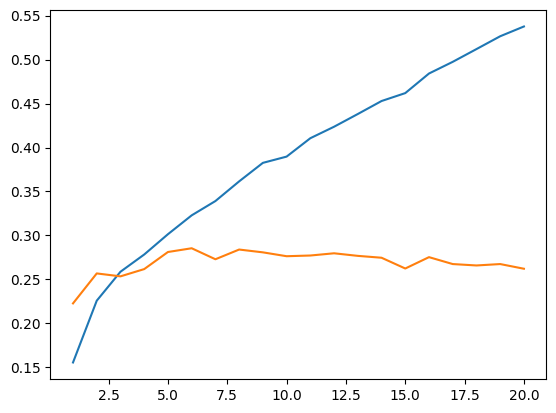

In [589]:
plt.plot([i for i in range(1,21)],history.history['accuracy'])
plt.plot([i for i in range(1,21)],history.history['val_accuracy'])
plt.show()

In [156]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_3 (Embedding)         │ (None, 33, 300)        │    11,158,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_4 (Bidirectional) │ (None, 33, 256)        │       330,240 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_5 (Bidirectional) │ (None, 33, 128)        │       123,648 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer_normalization_6           │ (None, 33, 128)        │           256 │
│ (LayerNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling1d        │ (None, 128)            │             0 │
│ (GlobalAveragePooling1D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer_normalization_7           │ (None, 128)            │           256 │
│ (LayerNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer_normalization_8           │ (None, 64)             │           128 │
│ (LayerNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 13)             │           845 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 12,598,625 (48.06 MB)

 Trainable params: 480,141 (1.83 MB)

 Non-trainable params: 11,158,200 (42.57 MB)

 Optimizer params: 960,284 (3.66 MB)

In [ ]:
x_testt = tokenizer.texts_to_sequences(x_test.tolist())
x_testt = np.array(x_testt)

In [341]:
# now evaluate on y_test (unseen data) (metrics: accuracy,precision,recall,f1-score)
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score

y_pred = model.predict(x_testt)

248/248 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step


In [357]:
y_pred = np.argmax(y_pred,axis=1)
y_test = np.argmax(y_test_hot,axis=1)

In [363]:
acc = accuracy_score(y_pred,y_test)
precision = precision_score(y_pred,y_test, average='weighted')
recall = recall_score(y_pred,y_test, average='weighted')
f1 = f1_score(y_pred,y_test,average='weighted')

c:\Users\vivek\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [364]:
acc,precision,recall,f1

(0.2891748675246026,
 0.3933474128762612,
 0.2891748675246026,
 0.32535759025265915)